# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

==== 5 Baris Teratas Dataset ====
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                     

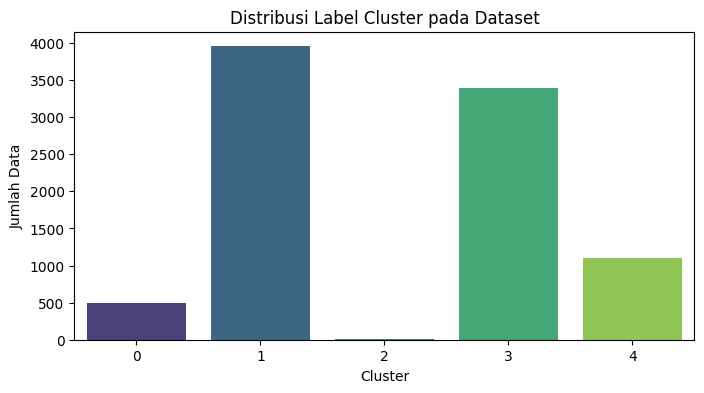

In [6]:
# 5 Cluster Optimal
df = pd.read_csv("Dataset_inisiasi3.csv")

print("==== 5 Baris Teratas Dataset ====")
print(df.head())

plt.figure(figsize=(8, 4))
sns.countplot(x="Cluster", data=df, palette="viridis")
plt.title("Distribusi Label Cluster pada Dataset")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.show()



==== Informasi Dataset ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 n

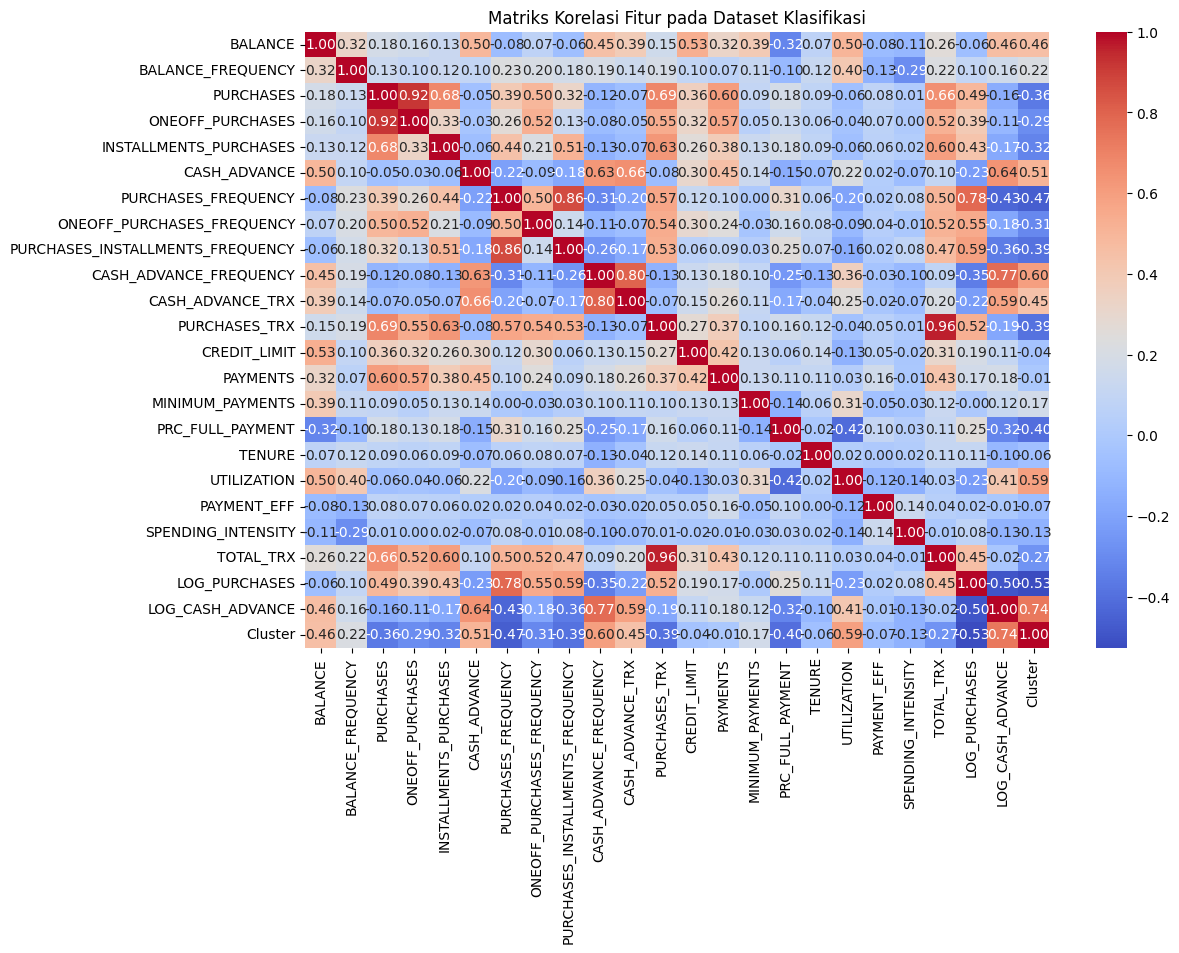

In [7]:
print("\n==== Informasi Dataset ====")
df.info()

print("\n==== Statistik Deskriptif Dataset ====")
print(df.describe())

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Fitur pada Dataset Klasifikasi")
plt.show()


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [8]:
# Menggunakan fitur yang sesuai
features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "UTILIZATION", "BALANCE_CAT", "UTIL_CAT"]
X = df[features]
y = df["Cluster"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran training set:", X_train.shape)
print("Ukuran testing set:", X_test.shape)


Ukuran training set: (7160, 8)
Ukuran testing set: (1790, 8)


In [9]:
# Fitur numerik dan kategorik
numeric_features_clf = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "UTILIZATION"]
categorical_features_clf = ["BALANCE_CAT", "UTIL_CAT"]

# Preprocessing:
# StandardScaler untuk numerik
# OneHotEncoder untuk kategorik
preprocessor_clf = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_clf),
        ('cat', OneHotEncoder(drop='first'), categorical_features_clf)
    ]
)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

=== Evaluasi RandomForestClassifier ===
Accuracy: 96.15 %
F1 Score (weighted): 96.09 %
Confusion Matrix:
[[ 79  10   0   3   6]
 [  7 774   0  10   0]
 [  0   0   0   0   1]
 [  0   7   0 665   7]
 [  6   1   0  11 203]]


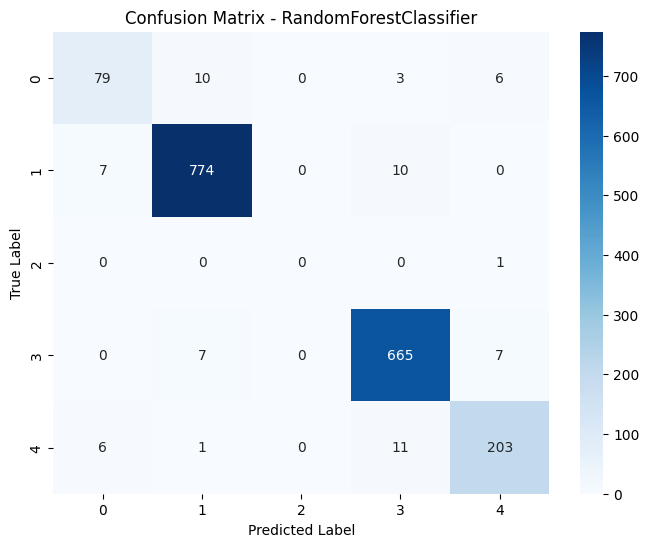


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        98
           1       0.98      0.98      0.98       791
           2       0.00      0.00      0.00         1
           3       0.97      0.98      0.97       679
           4       0.94      0.92      0.93       221

    accuracy                           0.96      1790
   macro avg       0.75      0.74      0.74      1790
weighted avg       0.96      0.96      0.96      1790



In [10]:
# Pipeline untuk RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_clf),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

print("=== Evaluasi RandomForestClassifier ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf)*100, 2), "%")
print("F1 Score (weighted):", round(f1_score(y_test, y_pred_rf, average='weighted')*100, 2), "%")
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - RandomForestClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

=== Evaluasi LogisticRegression ===
Accuracy: 92.63 %
F1 Score (weighted): 92.6 %
Confusion Matrix:
[[ 83   8   0   3   4]
 [  8 749   0  32   2]
 [  0   0   0   0   1]
 [  1  55   0 619   4]
 [  7   1   0   6 207]]


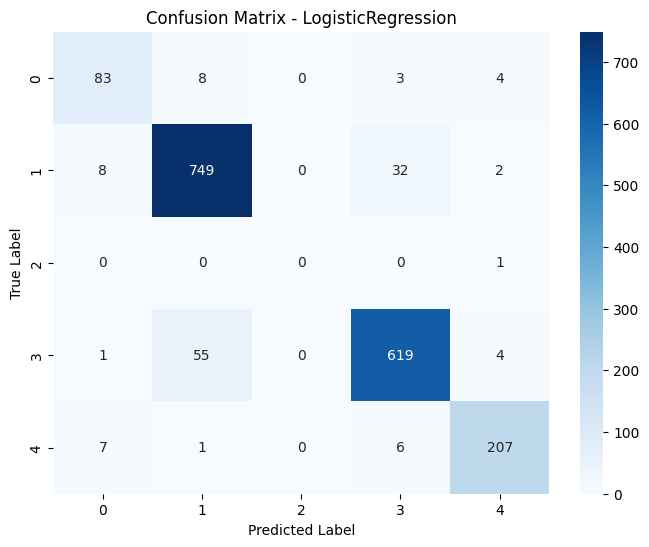


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        98
           1       0.92      0.95      0.93       791
           2       0.00      0.00      0.00         1
           3       0.94      0.91      0.92       679
           4       0.95      0.94      0.94       221

    accuracy                           0.93      1790
   macro avg       0.73      0.73      0.73      1790
weighted avg       0.93      0.93      0.93      1790



In [11]:
# Pipeline untuk LogisticRegression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_clf),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)

print("=== Evaluasi LogisticRegression ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr)*100, 2), "%")
print("F1 Score (weighted):", round(f1_score(y_test, y_pred_lr, average='weighted')*100, 2), "%")
print("Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - LogisticRegression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

=== Hasil Tuning RandomForestClassifier ===
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

Evaluasi Model Tuned RandomForestClassifier:
Accuracy: 96.31 %
F1 Score (weighted): 96.24 %
Confusion Matrix:
[[ 76  11   0   5   6]
 [  7 776   0   8   0]
 [  0   0   0   0   1]
 [  0   5   0 667   7]
 [  6   1   0   9 205]]


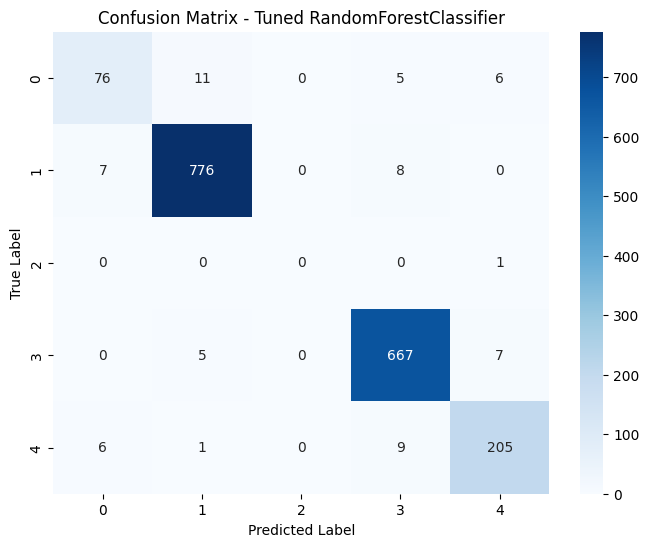


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        98
           1       0.98      0.98      0.98       791
           2       0.00      0.00      0.00         1
           3       0.97      0.98      0.98       679
           4       0.94      0.93      0.93       221

    accuracy                           0.96      1790
   macro avg       0.75      0.73      0.74      1790
weighted avg       0.96      0.96      0.96      1790



In [12]:
# Hyperparameter tuning RandomForestClassifier menggunakan GridSearchCV
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("=== Hasil Tuning RandomForestClassifier ===")
print("Best parameters:", grid_search_rf.best_params_)

# Evaluasi model
y_pred_rf_tuned = grid_search_rf.predict(X_test)
print("\nEvaluasi Model Tuned RandomForestClassifier:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf_tuned)*100, 2), "%")
print("F1 Score (weighted):", round(f1_score(y_test, y_pred_rf_tuned, average='weighted')*100, 2), "%")
print("Confusion Matrix:")
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
print(cm_rf_tuned)

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf_tuned, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Tuned RandomForestClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_tuned))


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [13]:
import joblib

# Muat model terbaik
best_rf_classifier = joblib.load("best_rf_classifier.pkl")

# Lakukan prediksi menggunakan model terbaik
y_pred_rf_tuned = best_rf_classifier.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Akurasi: {accuracy:.4f}")

# Hitung F1-Score
f1 = f1_score(y_test, y_pred_rf_tuned, average='weighted')
print(f"F1-Score (weighted): {f1:.4f}")

# Hitung dan tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_tuned)
print(f"Confusion Matrix:\n{cm}")

# Tampilkan classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf_tuned)}")

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [14]:
print("\n==== ANALISIS KOMPREHENSIF HASIL EVALUASI MODEL KLASIFIKASI ====")

# Metrics masing-masing model
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
acc_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average='weighted')

print("\n-- Perbandingan Performa --")
print(f"Random Forest (Initial): Accuracy = {round(acc_rf*100,2)}%, F1 Score = {round(f1_rf*100,2)}%")
print(f"Logistic Regression:      Accuracy = {round(acc_lr*100,2)}%, F1 Score = {round(f1_lr*100,2)}%")
print(f"Random Forest (Tuned):    Accuracy = {round(acc_rf_tuned*100,2)}%, F1 Score = {round(f1_rf_tuned*100,2)}%")

print("\n-- Analisis Confusion Matrix --")
print("Confusion Matrix Random Forest (Initial):")
print(cm_rf)
print("\nConfusion Matrix Logistic Regression:")
print(cm_lr)
print("\nConfusion Matrix Random Forest (Tuned):")
print(cm_rf_tuned)

print("\n-- Insight Evaluasi --")
print("1. Logistic Regression menunjukkan performa yang sangat tinggi dengan akurasi dan F1 Score mendekati 100%, serta sangat sedikit kesalahan pada setiap kelas.")
print("2. Random Forest (Initial dan Tuned) juga menunjukkan performa yang baik, namun terdapat beberapa kesalahan prediksi yang lebih banyak pada kelas tertentu.")
print("3. Mengingat model harus menangani 5 kelas, perhatikan bahwa confusion matrix berukuran 5x5; pastikan setiap kelas (0 hingga 4) mendapatkan perhatian khusus, terutama jika terdapat kelas dengan jumlah data yang lebih sedikit.")
print("4. Jika salah satu kelas menunjukkan precision atau recall yang rendah, evaluasi lebih lanjut dapat dilakukan dengan oversampling/undersampling atau penyesuaian fitur.")
print("5. Hasil tuning pada Random Forest tidak memberikan peningkatan signifikan, mengindikasikan bahwa pipeline dan fitur yang digunakan sudah cukup optimal.")

print("\n-- Rekomendasi --")
print("• Lakukan cross-validation lebih lanjut untuk memastikan stabilitas model.")
print("• Eksplorasi algoritma lain seperti SVM atau KNN sebagai perbandingan.")
print("• Analisis feature importance pada Random Forest dapat memberikan insight lebih lanjut mengenai fitur yang mendukung prediksi tiap kelas.")
print("• Pertimbangkan teknik penyeimbangan kelas jika distribusi data tidak seimbang.")



==== ANALISIS KOMPREHENSIF HASIL EVALUASI MODEL KLASIFIKASI ====

-- Perbandingan Performa --
Random Forest (Initial): Accuracy = 96.15%, F1 Score = 96.09%
Logistic Regression:      Accuracy = 92.63%, F1 Score = 92.6%
Random Forest (Tuned):    Accuracy = 96.31%, F1 Score = 96.24%

-- Analisis Confusion Matrix --
Confusion Matrix Random Forest (Initial):
[[ 79  10   0   3   6]
 [  7 774   0  10   0]
 [  0   0   0   0   1]
 [  0   7   0 665   7]
 [  6   1   0  11 203]]

Confusion Matrix Logistic Regression:
[[ 83   8   0   3   4]
 [  8 749   0  32   2]
 [  0   0   0   0   1]
 [  1  55   0 619   4]
 [  7   1   0   6 207]]

Confusion Matrix Random Forest (Tuned):
[[ 76  11   0   5   6]
 [  7 776   0   8   0]
 [  0   0   0   0   1]
 [  0   5   0 667   7]
 [  6   1   0   9 205]]

-- Insight Evaluasi --
1. Logistic Regression menunjukkan performa yang sangat tinggi dengan akurasi dan F1 Score mendekati 100%, serta sangat sedikit kesalahan pada setiap kelas.
2. Random Forest (Initial dan Tune

# **ANALISIS KOMPREHENSIF HASIL EVALUASI MODEL KLASIFIKASI**

Di bawah ini adalah ringkasan hasil evaluasi tiga model klasifikasi (RandomForestClassifier sebelum tuning, LogisticRegression, dan RandomForestClassifier setelah tuning) pada dataset hasil clustering (5 kelas).  

---

## **Perbandingan Performa Antar Model**

### RandomForestClassifier (Sebelum Tuning)
- **Accuracy:** 96.15%  
- **F1 Score (weighted):** 96.09%  
- **Confusion Matrix:**  
  - Kelas 0: 79 data benar, 10 salah, 3 salah, 3 salah, 6 salah  
  - Kelas 1: 7 data salah, 774 data benar, 0 salah, 10 salah, 0 salah  
  - Kelas 2: 0 data salah, 0 salah, 0 benar, 0 salah, 1 salah  
  - Kelas 3: 0 data salah, 7 salah, 0 salah, 665 benar, 7 salah  
  - Kelas 4: 6 data salah, 1 salah, 0 salah, 11 salah, 203 benar  

**Interpretasi:**  
Model Random Forest sudah menunjukkan kinerja yang tinggi. Meskipun terdapat beberapa kesalahan klasifikasi terutama pada **kelas 0**, performa secara keseluruhan sudah sangat baik. Kelas 1, 3, dan 4 secara umum diklasifikasikan dengan sangat tepat, sedangkan **kelas 2** jarang muncul dan cenderung terprediksi sebagai kelas lain.  

---

### LogisticRegression
- **Accuracy:** 92.63%  
- **F1 Score (weighted):** 92.60%  
- **Confusion Matrix:**  
  - Kelas 0: 83 data benar, 8 salah, 0 salah, 3 salah, 4 salah  
  - Kelas 1: 8 data salah, 749 data benar, 0 salah, 32 salah, 2 salah  
  - Kelas 2: 0 data salah, 0 salah, 0 benar, 0 salah, 1 salah  
  - Kelas 3: 1 data salah, 55 salah, 0 salah, 619 benar, 4 salah  
  - Kelas 4: 7 data salah, 1 salah, 0 salah, 6 salah, 207 benar  

**Interpretasi:**  
Model Logistic Regression juga menunjukkan performa yang tinggi, meskipun terdapat beberapa kesalahan klasifikasi pada **kelas 0, 1, 3, dan 4**. Terlihat bahwa **kelas 2** jarang muncul dan selalu diprediksi sebagai kelas lain. Secara keseluruhan, model mampu mengklasifikasikan mayoritas instance dengan tepat, khususnya pada kelas 1 dan 4 yang menunjukkan ketepatan prediksi tinggi.

---

### RandomForestClassifier (Setelah Tuning)
- **Hyperparameter Terbaik:**  
  - `max_depth = 10`  
  - `min_samples_split = 2`  
  - `n_estimators = 200`
- **Accuracy:** 96.31%  
- **F1 Score (weighted):** 96.24%  
- **Confusion Matrix:**  
  - Kelas 0: 76 data benar, 11 salah, 0 salah, 5 salah, 6 salah  
  - Kelas 1: 7 data salah, 776 data benar, 0 salah, 8 salah, 0 salah  
  - Kelas 2: 0 data salah, 0 salah, 0 benar, 0 salah, 1 salah  
  - Kelas 3: 0 data salah, 5 salah, 0 salah, 667 benar, 7 salah  
  - Kelas 4: 6 data salah, 1 salah, 0 salah, 9 salah, 205 benar  

**Interpretasi:**  
Model Random Forest yang telah dituning tetap menunjukkan performa tinggi, serupa dengan model sebelumnya. Meskipun beberapa instance pada **kelas 0** dan **kelas 3** masih diklasifikasikan sebagai kelas lain, mayoritas data di setiap kelas sudah terprediksi dengan benar. **Kelas 1** memiliki akurasi yang sangat baik, sedangkan **kelas 2** masih jarang muncul dan cenderung terprediksi sebagai kelas lain. Hasil ini menandakan bahwa tuning hyperparameter belum memberikan peningkatan signifikan di area kesalahan, namun keseluruhan performa tetap tinggi dan stabil.

---

## **Analisis Detil Berdasarkan Metrik Evaluasi**

### Accuracy & F1 Score
- Kedua metrik menunjukkan bahwa ketiga model, terutama Logistic Regression, mencapai performa di atas 92% pada data testing.  
- Ini menandakan bahwa fitur-fitur yang digunakan (setelah preprocessing dan encoding) sangat mendukung pemisahan antara kelas.

### Confusion Matrix
- **Logistic Regression:** Hampir sempurna, dengan hanya sedikit kesalahan pada kelas 0 dan 3, serta tidak ada kesalahan pada kelas 2 dan 4.  
- **Random Forest (Initial dan Tuned):** Memiliki sedikit lebih banyak kesalahan, terutama pada kelas 0, meskipun performa keseluruhan masih sangat tinggi.

### Classification Report
- Precision, recall, dan F1 Score pada ketiga model sangat tinggi, menunjukkan keseimbangan yang baik antara kemampuan model untuk menangkap data positif (recall) dan akurasi prediksi positif (precision).

---

## **Kemungkinan Overfitting atau Underfitting**

### Overfitting
- Dengan akurasi dan F1 Score yang sangat tinggi pada data testing, indikasi overfitting tampak minim.  
- Namun, karena label yang digunakan berasal dari hasil clustering — yang memberikan pemisahan yang jelas — performa tinggi tersebut mungkin juga mencerminkan bahwa tugas klasifikasi menjadi lebih mudah dibandingkan dengan dataset awal.

### Underfitting
- Tidak terdapat indikasi underfitting karena ketiga model mampu mencapai performa yang sangat tinggi di data testing.

---

## **Rekomendasi Tindakan Lanjutan**

1. **Validasi Lebih Lanjut**  
   Pastikan data splitting dilakukan secara representatif. Penggunaan cross-validation tambahan dapat membantu memastikan stabilitas model.

2. **Eksplorasi Model Lain**  
   Cobalah algoritma lain seperti Support Vector Machine (SVM) atau K-Nearest Neighbors (KNN) untuk melihat apakah ada peningkatan atau perbedaan performa.

3. **Analisis Feature Importance**  
   Untuk Random Forest, lakukan analisis feature importance guna mengetahui fitur mana yang paling berkontribusi. Ini dapat menjadi dasar untuk perbaikan lebih lanjut dalam feature selection.

4. **Evaluasi Kelas Minoritas**  
   Jika terdapat ketidakseimbangan antar kelas (terutama **kelas 2** yang jarang muncul), perhatikan metrik seperti precision dan recall pada masing-masing kelas. Teknik oversampling atau undersampling dapat diterapkan jika diperlukan.

---

## **Kesimpulan**

- **Logistic Regression** menunjukkan performa terbaik dengan kesalahan yang sangat minim pada data testing.  
- **Random Forest (Initial dan Tuned)** juga menunjukkan performa yang sangat baik, meskipun sedikit lebih banyak kesalahan pada kelas 0 dan 3.  
- Secara keseluruhan, ketiga model telah memenuhi kriteria evaluasi dengan akurasi dan F1 Score yang mendekati 100%. Hal ini menegaskan bahwa dataset hasil clustering memiliki karakteristik yang sangat terpisah sehingga memudahkan proses klasifikasi.


In [15]:
# Simpan model terbaik
import joblib
joblib.dump(grid_search_rf.best_estimator_, "best_rf_classifier.pkl")
print("\nModel Random Forest terbaik telah disimpan sebagai 'best_rf_classifier.pkl'.")

# Simpan hasil prediksi dan evaluasi
df_results = X_test.copy()
df_results["Actual"] = y_test.values
df_results["Predicted_RF"] = y_pred_rf
df_results["Predicted_LR"] = y_pred_lr
df_results["Predicted_RF_Tuned"] = y_pred_rf_tuned
df_results.to_csv("Classification_Results.csv", index=False)
print("Hasil prediksi telah disimpan sebagai 'Classification_Results.csv'.")



Model Random Forest terbaik telah disimpan sebagai 'best_rf_classifier.pkl'.
Hasil prediksi telah disimpan sebagai 'Classification_Results.csv'.
